<a href="https://colab.research.google.com/github/Rudrakshbhardwaj01/Deep-Learning/blob/main/CatDogClassifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
# ============================================
# STEP 1: Install dependencies
# ============================================
!pip install kagglehub tensorflow --quiet
!pip install tqdm --quiet

# ============================================
# STEP 2: Authenticate Kaggle API
# ============================================
from google.colab import files
print("👉 Upload your kaggle.json file (from Kaggle > Account > Create New API Token)")
files.upload()  # Choose kaggle.json

# Move kaggle.json to correct location
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

# ============================================
# STEP 3: Download dataset using kagglehub
# ============================================
import kagglehub
import os
import shutil
import imghdr
from tqdm import tqdm

# Download dataset
src_path = kagglehub.dataset_download("shaunthesheep/microsoft-catsvsdogs-dataset")
print("✅ Dataset downloaded to:", src_path)

# Original images path
src_dir = os.path.join(src_path, "PetImages")

# Copy to writable folder in Colab
dst_dir = "/content/cats_vs_dogs_cleaned"
if not os.path.exists(dst_dir):
    print("Copying dataset to writable directory...")
    shutil.copytree(src_dir, dst_dir)
else:
    print("Dataset already exists at:", dst_dir)

# ============================================
# STEP 4: Remove corrupted images
# ============================================
print("\nRemoving corrupted images...")
for category in ["Cat", "Dog"]:
    folder = os.path.join(dst_dir, category)
    for img_name in tqdm(os.listdir(folder), desc=f"Cleaning {category}"):
        file_path = os.path.join(folder, img_name)
        try:
            if os.path.getsize(file_path) == 0 or imghdr.what(file_path) not in ["jpeg", "png", "jpg"]:
                os.remove(file_path)
        except Exception:
            if os.path.exists(file_path):
                os.remove(file_path)
print("✅ Cleaning complete.")

👉 Upload your kaggle.json file (from Kaggle > Account > Create New API Token)


Saving kaggle.json to kaggle.json


/tmp/ipython-input-2654913184.py:25: DeprecationWarning: 'imghdr' is deprecated and slated for removal in Python 3.13
  import imghdr


Using Colab cache for faster access to the 'microsoft-catsvsdogs-dataset' dataset.
✅ Dataset downloaded to: /kaggle/input/microsoft-catsvsdogs-dataset
Copying dataset to writable directory...

Removing corrupted images...


Cleaning Dog: 100%|██████████| 12501/12501 [00:00<00:00, 51319.21it/s]

✅ Cleaning complete.


In [13]:
import tensorflow as tf

In [14]:
train_ds = tf.keras.utils.image_dataset_from_directory(
    dst_dir,
    image_size=(256, 256),
    batch_size=128,
    shuffle=True
)


Found 24748 files belonging to 2 classes.


In [15]:
# Normalize we want the pixel values between 0 and 1, right now they are between 0 and 255

def normalize(image, label):
    """
    Normalize image pixel values from [0, 255] → [0, 1].

    Args:
        image: TensorFlow image tensor
        label: Corresponding label tensor

    Returns:
        Tuple of (normalized_image, label)
    """
    image = tf.cast(image, tf.float32) / 255.0
    return image, label


In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

In [17]:
# CNN
model=Sequential()

model.add(Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(256,256,3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64,kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(128,kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1,activation='sigmoid'))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [18]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 125, 125, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 60, 60, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 30, 30, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 115200)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │    14,745,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,839,105 (56.61 MB)

 Trainable params: 14,839,105 (56.61 MB)

 Non-trainable params: 0 (0.00 B)

In [19]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [21]:
history=model.fit(train_ds,epochs=10)

Epoch 1/10
194/194 ━━━━━━━━━━━━━━━━━━━━ 47s 239ms/step - accuracy: 0.6861 - loss: 0.5910
Epoch 2/10
194/194 ━━━━━━━━━━━━━━━━━━━━ 47s 240ms/step - accuracy: 0.7167 - loss: 0.5569
Epoch 3/10
194/194 ━━━━━━━━━━━━━━━━━━━━ 47s 239ms/step - accuracy: 0.7637 - loss: 0.4797
Epoch 4/10
194/194 ━━━━━━━━━━━━━━━━━━━━ 82s 240ms/step - accuracy: 0.7987 - loss: 0.4288
Epoch 5/10
194/194 ━━━━━━━━━━━━━━━━━━━━ 46s 238ms/step - accuracy: 0.8305 - loss: 0.3701
Epoch 6/10
194/194 ━━━━━━━━━━━━━━━━━━━━ 47s 239ms/step - accuracy: 0.8569 - loss: 0.3242
Epoch 7/10
194/194 ━━━━━━━━━━━━━━━━━━━━ 46s 239ms/step - accuracy: 0.8788 - loss: 0.2849
Epoch 8/10
194/194 ━━━━━━━━━━━━━━━━━━━━ 82s 240ms/step - accuracy: 0.8934 - loss: 0.2463
Epoch 9/10
194/194 ━━━━━━━━━━━━━━━━━━━━ 46s 239ms/step - accuracy: 0.9066 - loss: 0.2306
Epoch 10/10
194/194 ━━━━━━━━━━━━━━━━━━━━ 47s 239ms/step - accuracy: 0.9184 - loss: 0.2018


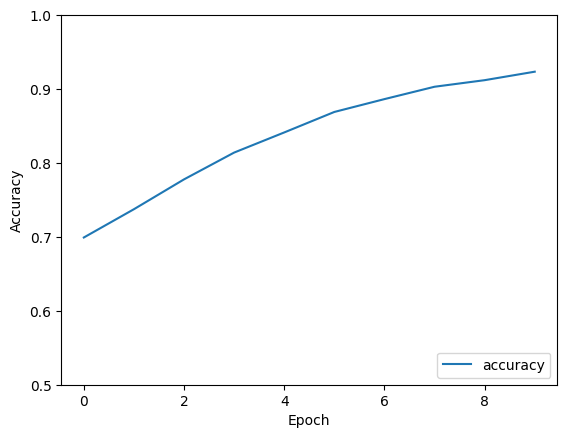

In [22]:
# Accuracy plot
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], label='accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
#

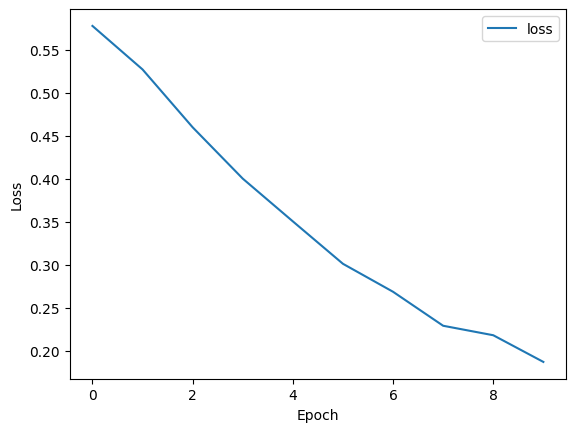

In [23]:
# Loss plot
plt.plot(history.history['loss'], label='loss')

plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')